This notebooks is a temporary workaround while we're waiting for the full data results from rerunning matches to come through. It generates the same CSVs as used before, but reusing the old data files.

In [1]:
import sc2ts
import numpy as np
import pandas as pd
import json

In [2]:
df_recombs = pd.read_csv("sc2ts_v1_2023-02-21_pp_dated_remapped_bps_pango_recombinants.csv", index_col=0)
df_recombs

,sample_id,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,date_added,...,parent_right_scorpio,parent_right_time,parent_right_date,parent_mrca,parent_mrca_pango,parent_mrca_scorpio,parent_mrca_time,parent_mrca_date,diffs,max_run_length
766,ERR9939974,1,1,1,695,958,1,COVID-ARTIC-V4.1,.,2022-06-27,...,Omicron (BA.4-like),290.000000,2022-05-07,220185,B.1.617.2,Delta (B.1.617.2-like),789.321973,2020-12-24,26,2
361,SRR20259474,1,1,1,510,1222,1,COVID-AMPLISEQ-V1,.,2021-10-21,...,Delta (B.1.617.2-like),509.000000,2021-09-30,220139,B.1.617.2,Delta (B.1.617.2-like),789.305131,2020-12-24,21,2
842,ERR10219711,2,1,1,695,1453,1,COVID-ARTIC-V4.1,.,2022-08-30,...,Omicron (BA.4-like),325.522627,2022-04-02,791357,BA.1,Omicron (BA.1-like),468.253785,2021-11-10,27,2
740,ERR9848224,855,1,1,695,1627,1,COVID-ARTIC-V4.1,.,2022-05-30,...,Omicron (BA.5-like),287.000000,2022-05-10,59,B.1,.,1120.205275,2020-01-28,90,8
763,ERR9940192,662,1,1,695,1627,0,COVID-ARTIC-V4.1,.,2022-06-26,...,Omicron (BA.5-like),328.000000,2022-03-30,791357,BA.1,Omicron (BA.1-like),468.253785,2021-11-10,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,SRR21671244,2,1,1,29667,29729,3,COVID-ARTIC-V4.1,.,2022-09-06,...,Omicron (BA.2-like),387.004892,2022-01-30,220185,B.1.617.2,Delta (B.1.617.2-like),789.321973,2020-12-24,39,5
912,ERR10708209,37,12,1,28682,29729,8,COVID-ARTIC-V4.1,4.1alt,2022-12-17,...,Omicron (BA.2-like),387.004892,2022-01-30,887654,BA.2,Omicron (BA.2-like),452.000000,2021-11-26,43,5
928,ERR10933490,2,1,1,27916,29729,3,COVID-ARTIC-V4.1,4.1alt,2023-02-13,...,Omicron (BA.2-like),387.004892,2022-01-30,794989,BA.1,Omicron (BA.1-like),468.253785,2021-11-10,38,2
597,SRR18234565,14,2,1,25923,29734,1,COVID-VARSKIP-V1a-2b,.,2022-02-08,...,Omicron (BA.1-like),397.000000,2022-01-20,791357,BA.1,Omicron (BA.1-like),468.253785,2021-11-10,12,2


In [3]:
rerun_matches = []
with open("../data/recombinant_reruns.json") as f:
    for line in f:
        rerun_matches.append(json.loads(line))
        


In [4]:
with open("samples_that_changed.json") as f:
    for line in f:
        rerun_matches.append(json.loads(line))

In [5]:
samples_for_arg_recombs = set(df_recombs.sample_id)
num_mutations_k1000 = {}
for run in rerun_matches:
    sample_id = run["strain"]
    if sample_id in samples_for_arg_recombs and run["num_mismatches"]==1000:
        m = run["match"]
        assert len(m["path"]) == 1
        num_mutations_k1000[sample_id] = len(m["mutations"])        
assert set(num_mutations_k1000.keys()) == samples_for_arg_recombs

In [6]:
df_recombs_tmp = df_recombs.set_index("sample_id")
df_recombs_tmp["num_mutations_k1000"] = num_mutations_k1000
df_recombs_tmp["num_mutations_k4"] = df_recombs_tmp["num_mutations"] # For clarity
df_recombs_tmp

,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,date_added,group_id,...,parent_right_date,parent_mrca,parent_mrca_pango,parent_mrca_scorpio,parent_mrca_time,parent_mrca_date,diffs,max_run_length,num_mutations_k1000,num_mutations_k4
sample_id,,,,,,,,,,,,,,,,,,,,,
ERR9939974,1,1,1,695,958,1,COVID-ARTIC-V4.1,.,2022-06-27,96ff31d5f4,...,2022-05-07,220185,B.1.617.2,Delta (B.1.617.2-like),789.321973,2020-12-24,26,2,7,1
SRR20259474,1,1,1,510,1222,1,COVID-AMPLISEQ-V1,.,2021-10-21,1476c0b3d5,...,2021-09-30,220139,B.1.617.2,Delta (B.1.617.2-like),789.305131,2020-12-24,21,2,5,1
ERR10219711,2,1,1,695,1453,1,COVID-ARTIC-V4.1,.,2022-08-30,a8925084fc,...,2022-04-02,791357,BA.1,Omicron (BA.1-like),468.253785,2021-11-10,27,2,5,1
ERR9848224,855,1,1,695,1627,1,COVID-ARTIC-V4.1,.,2022-05-30,3db839925c,...,2022-05-10,59,B.1,.,1120.205275,2020-01-28,90,8,6,1
ERR9940192,662,1,1,695,1627,0,COVID-ARTIC-V4.1,.,2022-06-26,12ba9c78bd,...,2022-03-30,791357,BA.1,Omicron (BA.1-like),468.253785,2021-11-10,15,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR21671244,2,1,1,29667,29729,3,COVID-ARTIC-V4.1,.,2022-09-06,335aff0f85,...,2022-01-30,220185,B.1.617.2,Delta (B.1.617.2-like),789.321973,2020-12-24,39,5,7,3
ERR10708209,37,12,1,28682,29729,8,COVID-ARTIC-V4.1,4.1alt,2022-12-17,5872e2e5c8,...,2022-01-30,887654,BA.2,Omicron (BA.2-like),452.000000,2021-11-26,43,5,12,8
ERR10933490,2,1,1,27916,29729,3,COVID-ARTIC-V4.1,4.1alt,2023-02-13,fc84b5db6f,...,2022-01-30,794989,BA.1,Omicron (BA.1-like),468.253785,2021-11-10,38,2,7,3


In [7]:
df_recombs = df_recombs_tmp.sort_values("recombinant").reset_index().set_index("recombinant")


In [8]:
df_recombs_old = pd.read_csv("../data/recombinants.csv").sort_values("recombinant").set_index("recombinant")
df_recombs_old

,descendants,sample,sample_id,sample_pango,interval_left,interval_right,num_mutations,date_added,group_id,parent_left,...,Artic_primer_version,break_near_missing_run_12_7,net_min_supporting_loci_lft,net_min_supporting_loci_rgt,net_min_supporting_loci_lft_rgt_ge_4,parent_left_scorpio,parent_right_scorpio,sample_scorpio,time_tsdate,date_tsdate
recombinant,,,,,,,,,,,,,,,,,,,,,
1530,1,1529,ERR4437465,B.1.157,8783,13617,2,2020-03-22,052b938d3189a1c873abd3ffd894e4c6,1121,...,3,False,5,5,True,.,.,.,1070.000000,2020-03-18
22500,1,22499,ERR4638271,B.1.1.217,26528,26714,2,2020-07-23,96ae2d6491a4e2d9432c231e6f2bb7a0,21314,...,3,False,11,2,False,.,.,.,951.000000,2020-07-15
26465,54,26464,ERR4615866,B.1.221,15325,21855,1,2020-08-24,dccf6a6ff6f85d67cdd5a7e5c0e5d758,22349,...,3,False,5,9,True,.,.,.,982.138198,2020-06-14
27003,3,27002,ERR4671078,B.1.160,22993,25563,2,2020-08-26,0c768f9bb44f8c5d4daf59582c6c9a16,25312,...,3,False,13,10,True,.,.,.,961.229752,2020-07-05
28379,3,28378,SRR21719160,B.1.426,6542,9515,0,2020-09-02,d856a9a4583881e765e24caeb4533948,27386,...,.,False,4,18,True,.,.,.,907.000000,2020-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430261,1,1430260,ERR10839848,CH.1.1,19327,20741,2,2023-01-23,d5ca15babe3403d4d5764e614d8cf68f,1419012,...,4.1alt,False,17,22,True,Omicron (XBB.1-like),Omicron (BA.2-like),Omicron (BA.2-like),37.504545,2023-01-15
1430452,1,1430451,SRR23358540,CH.1.1,9867,12160,1,2023-01-23,b7c8e0260ee65249105de96d2a5c50e3,1401739,...,.,False,12,29,True,Omicron (BA.5-like),Omicron (BA.2-like),Omicron (BA.2-like),56.687903,2022-12-27
1431988,1,1431987,ERR10931828,CH.1.1,19887,21811,2,2023-01-29,efa2dbff2716ef08d00943f0d5c83395,1427718,...,4.1alt,False,5,4,True,Omicron (BA.2-like),Omicron (BA.2-like),Omicron (BA.2-like),28.433690,2023-01-24


In [9]:
set(df_recombs_old.index.values) == set(df_recombs.index)

True

## Which recombinants have changed because of the sample selection?

The number of mutations has changed slightly because we use different samples

In [10]:
select = df_recombs["num_mutations_k1000"] != df_recombs_old["k1000_num_mutations"]
df_tmp = df_recombs[select].copy()
df_tmp["old_num_mutations"] = df_recombs_old[select]["k1000_num_mutations"]
df_tmp

,sample_id,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,date_added,...,parent_mrca,parent_mrca_pango,parent_mrca_scorpio,parent_mrca_time,parent_mrca_date,diffs,max_run_length,num_mutations_k1000,num_mutations_k4,old_num_mutations
recombinant,,,,,,,,,,,,,,,,,,,,,
293131,SRR15230096,2458,2,1,19678,22027,1,COVID-AMPLISEQ-V1,.,2021-06-16,...,903506,BA.2,Omicron (BA.2-like),452.000000,2021-11-26,16,5,7,1,9
421731,SRR15708579,3,2,1,11563,22783,1,COVID-VARSKIP-V1a-2b,.,2021-08-16,...,52736,B.1.351,Beta (B.1.351-like),925.832939,2020-08-10,18,0,6,1,7
575251,SRR16527390,14,2,1,17914,22027,1,COVID-AMPLISEQ-V1,.,2021-09-27,...,220186,B.1.617.2,Delta (B.1.617.2-like),900.490817,2020-09-04,13,5,5,1,6
748969,SRR20251930,3,2,1,22027,22027,1,COVID-AMPLISEQ-V1,.,2021-11-10,...,220139,B.1.617.2,Delta (B.1.617.2-like),789.305131,2020-12-24,13,5,5,1,6
854285,SRR20186624,4,3,1,8753,22027,1,COVID-AMPLISEQ-V1,.,2021-12-04,...,220139,B.1.617.2,Delta (B.1.617.2-like),789.305131,2020-12-24,11,5,5,1,6
1388466,SRR21976891,2,2,1,23536,25463,0,COVID-ARTIC-V4.1,.,2022-10-07,...,1189192,BA.5,Omicron (BA.5-like),357.000000,2022-03-01,25,2,6,0,7
1396207,ERR10426560,6455,12,6,22332,22577,13,COVID-ARTIC-V4.1,4.1alt,2022-10-18,...,220139,B.1.617.2,Delta (B.1.617.2-like),789.305131,2020-12-24,38,2,21,13,22
1420385,ERR10708634,185,11,3,5184,9866,4,COVID-ARTIC-V4.1,4.1alt,2022-12-20,...,843172,BA.2,Omicron (BA.2-like),447.000000,2021-12-01,48,5,10,4,11


In [11]:
df_tmp[["sample_pango", "num_mutations_k1000", "old_num_mutations"]]


,sample_pango,num_mutations_k1000,old_num_mutations
recombinant,,,
293131,AY.114,7,9
421731,AY.3,6,7
575251,AY.117,5,6
748969,AY.39,5,6
854285,AY.4,5,6
1388466,BA.5.1,6,7
1396207,XBB.1,21,22
1420385,XBF,10,11


## Pangonet

In [12]:
from pangonet.pangonet import PangoNet
pango = PangoNet().build()


2025-07-01 13:06:01,735 INFO:Downloading file: ./alias_key.json
2025-07-01 13:06:02,196 INFO:Downloading file: ./lineage_notes.txt
2025-07-01 13:06:02,611 INFO:Creating aliases.
2025-07-01 13:06:02,615 INFO:Creating network.


In [13]:
def add_parent_pangonet_distance(df):
    
    parent_path_len = []
    for _, row in df.iterrows():
        left_pp = row["parent_left_pango"]
        right_pp = row["parent_right_pango"]
        mrcas = pango.get_mrca([left_pp, right_pp])
        assert len(mrcas) == 1
        mrca = mrcas[0]
        sample_p = row["sample_pango"]
        parent_paths = {}
        for name, parent_pango in [("left", left_pp), ("right", right_pp)]:
            paths = pango.get_paths(start=parent_pango, end=mrca)
            # We can have multiple paths because of recombinant lineages. Taking
            # the minimum seems simplest.
            min_len = min(len(path) for path in paths)
            for path in paths:
                if len(path) == min_len:
                    parent_paths[name] = path
                    break
        left_path = parent_paths["left"]
        right_path = parent_paths["right"]
        assert left_path[-1] == right_path[-1]
        parent_path_len.append(len(left_path) + len(right_path) - 2)

    df["parent_pangonet_distance"] = parent_path_len
    return df

df_recombs = add_parent_pangonet_distance(df_recombs)

<Axes: >

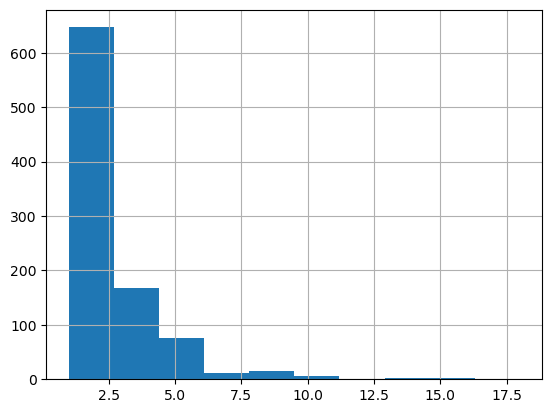

In [14]:
df_recombs["parent_pangonet_distance"].hist()

In [15]:

df_recombs.to_csv("sc2ts_v1_2023-02-21_pp_dated_remapped_bps_pango_recombinants_matches_pangonet.csv")